<a href="https://colab.research.google.com/github/Requenamar3/DeepLearning/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd

In [ ]:
#connect to dataset
url = 'https://raw.githubusercontent.com/fenago/datasets/main/mushrooms.csv'
df = pd.read_csv(url)

In [ ]:
#inspect data set
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
864,e,x,y,y,t,a,f,c,b,w,...,s,w,w,p,w,o,p,n,s,m
6385,p,f,y,e,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
5243,e,k,s,b,t,n,f,c,b,e,...,s,w,e,p,w,t,e,w,c,w
3265,p,x,f,g,f,f,f,c,b,h,...,k,b,n,p,w,o,l,h,y,p
2342,e,x,f,e,t,n,f,c,b,u,...,s,p,w,p,w,o,p,n,v,d


In [ ]:
# convert categorical variables into binary or dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
#splitting data set for training

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop('class_p', axis=1)
y = df_encoded['class_p']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train: Training set features

X_test: Testing set features

y_train: Training set target variable

y_test: Testing set target variable

test_size=0.2: 20% of the data is used for testing and 80% for training

random_state=42: Sets the random seed to 42 for reproducibility of the split


In [ ]:
# Count the samples in each set
training_samples = X_train.shape[0]
testing_samples = X_test.shape[0]

print("Number of samples in the training set:", training_samples)
print("Number of samples in the testing set:", testing_samples)

Number of samples in the training set: 6499
Number of samples in the testing set: 1625


In [ ]:
import tensorflow as tf

# Set the random seed for reproducibility
tf.random.set_seed(42)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),  # First hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),  # Second hidden layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),  # Third hidden layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and Sigmoid activation
])

# Compile the model with the specified loss, optimizer, and metrics
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),  # Binary cross-entropy loss function
    optimizer=tf.keras.optimizers.Adam(lr=0.001),  # Adam optimizer with learning rate 0.001
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')  # Binary accuracy metric for evaluation
    ]
)

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=100)


Epoch 1/100
204/204 [==============================] - 2s 3ms/step - loss: 0.0798 - accuracy: 0.9757
Epoch 2/100
204/204 [==============================] - 1s 3ms/step - loss: 9.0161e-04 - accuracy: 0.9998
Epoch 3/100
204/204 [==============================] - 1s 3ms/step - loss: 1.3031e-04 - accuracy: 1.0000
Epoch 4/100
204/204 [==============================] - 1s 2ms/step - loss: 5.2258e-05 - accuracy: 1.0000
Epoch 5/100
204/204 [==============================] - 0s 2ms/step - loss: 2.0880e-05 - accuracy: 1.0000
Epoch 6/100
204/204 [==============================] - 0s 2ms/step - loss: 1.0644e-05 - accuracy: 1.0000
Epoch 7/100
204/204 [==============================] - 0s 2ms/step - loss: 6.4084e-06 - accuracy: 1.0000
Epoch 8/100
204/204 [==============================] - 0s 2ms/step - loss: 4.2098e-06 - accuracy: 1.0000
Epoch 9/100
204/204 [==============================] - 0s 2ms/step - loss: 2.9808e-06 - accuracy: 1.0000
Epoch 10/100
204/204 [==============================] - 0s 

In [ ]:
#making predictions
predictions = model.predict(X_test)

51/51 [==============================] - 0s 1ms/step


In [ ]:
prediction_classes_class = [
    'p' if prob > 0.5 else 'e' for prob in np.ravel(predictions)
]
# prediction_classes_class: Binary predictions converted to class labels ('p' for poisonous, 'e' for edible)
# predictions: Predicted values for the testing set based on the trained model
# np.ravel(predictions): Flattened predictions array for easier iteration

prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
# prediction_classes: Binary predictions (0 or 1) based on the predicted probabilities
# If the probability (prob) is greater than 0.5, the prediction is assigned 1 (indicating 'p' or poisonous),
# otherwise, it is assigned 0 (indicating 'e' or edible)

prediction_classes
# prediction_classes: Final binary predictions (0 or 1) for the testing set

[0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix

cm = confusion_matrix(y_test, prediction_classes)
# cm: Confusion matrix computed using the true target values (y_test) and the predicted classes (prediction_classes)
# y_test: True target values for the testing set
# prediction_classes: Predicted classes (binary predictions) for the testing set

print(cm)



[[843   0]
 [  0 782]]


In [ ]:
from sklearn.metrics import accuracy_score

# Compute the accuracy score
accuracy = accuracy_score(y_test, prediction_classes)
# accuracy: Accuracy score computed using the true target values (y_test) and the predicted classes (prediction_classes)
# y_test: True target values for the testing set
# prediction_classes: Predicted classes (binary predictions) for the testing set

print(f'Accuracy: {accuracy:.2f}')
# Print the accuracy score

Accuracy: 1.00


In [ ]:
#changing the learning rate
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),  # Decreasing learning rate to 0.0001
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

# Train the model
history = model.fit(X_train, y_train, epochs=100)


Epoch 1/100
204/204 [==============================] - 2s 2ms/step - loss: 0.0812 - accuracy: 0.9715
Epoch 2/100
204/204 [==============================] - 1s 2ms/step - loss: 5.1734e-04 - accuracy: 1.0000
Epoch 3/100
204/204 [==============================] - 1s 3ms/step - loss: 1.3151e-04 - accuracy: 1.0000
Epoch 4/100
204/204 [==============================] - 1s 3ms/step - loss: 6.8339e-05 - accuracy: 1.0000
Epoch 5/100
204/204 [==============================] - 1s 3ms/step - loss: 3.7888e-05 - accuracy: 1.0000
Epoch 6/100
204/204 [==============================] - 1s 3ms/step - loss: 2.4691e-05 - accuracy: 1.0000
Epoch 7/100
204/204 [==============================] - 0s 2ms/step - loss: 1.7293e-05 - accuracy: 1.0000
Epoch 8/100
204/204 [==============================] - 0s 2ms/step - loss: 1.2466e-05 - accuracy: 1.0000
Epoch 9/100
204/204 [==============================] - 0s 2ms/step - loss: 9.2043e-06 - accuracy: 1.0000
Epoch 10/100
204/204 [==============================] - 0s 

In [ ]:
#changing number of layers

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'), # adding another layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

# Train the model
history = model.fit(X_train, y_train, epochs=100)


Epoch 1/100
204/204 [==============================] - 2s 2ms/step - loss: 0.0701 - accuracy: 0.9743
Epoch 2/100
204/204 [==============================] - 0s 2ms/step - loss: 3.5257e-04 - accuracy: 1.0000
Epoch 3/100
204/204 [==============================] - 0s 2ms/step - loss: 7.1817e-05 - accuracy: 1.0000
Epoch 4/100
204/204 [==============================] - 0s 2ms/step - loss: 3.3816e-05 - accuracy: 1.0000
Epoch 5/100
204/204 [==============================] - 0s 2ms/step - loss: 1.9350e-05 - accuracy: 1.0000
Epoch 6/100
204/204 [==============================] - 0s 2ms/step - loss: 1.1997e-05 - accuracy: 1.0000
Epoch 7/100
204/204 [==============================] - 0s 2ms/step - loss: 8.2041e-06 - accuracy: 1.0000
Epoch 8/100
204/204 [==============================] - 0s 2ms/step - loss: 5.6819e-06 - accuracy: 1.0000
Epoch 9/100
204/204 [==============================] - 0s 2ms/step - loss: 3.9668e-06 - accuracy: 1.0000
Epoch 10/100
204/204 [==============================] - 0s 

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Define the model with L1 regularization
model_l1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_l1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

# Define early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=10,
    restore_best_weights=True
)

# Train the model with early stopping
history_l1 = model_l1.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)


Epoch 1/100
204/204 [==============================] - 2s 3ms/step - loss: 1.3033 - accuracy: 0.9665 - val_loss: 0.4597 - val_accuracy: 0.9988
Epoch 2/100
204/204 [==============================] - 1s 3ms/step - loss: 0.3122 - accuracy: 0.9986 - val_loss: 0.2222 - val_accuracy: 0.9994
Epoch 3/100
204/204 [==============================] - 1s 3ms/step - loss: 0.1778 - accuracy: 0.9988 - val_loss: 0.1421 - val_accuracy: 0.9994
Epoch 4/100
204/204 [==============================] - 1s 4ms/step - loss: 0.1224 - accuracy: 0.9988 - val_loss: 0.1041 - val_accuracy: 0.9994
Epoch 5/100
204/204 [==============================] - 1s 4ms/step - loss: 0.0933 - accuracy: 0.9992 - val_loss: 0.0826 - val_accuracy: 0.9994
Epoch 6/100
204/204 [==============================] - 1s 4ms/step - loss: 0.0749 - accuracy: 0.9989 - val_loss: 0.0720 - val_accuracy: 1.0000
Epoch 7/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0631 - accuracy: 0.9994 - val_loss: 0.0577 - val_accuracy: 0.9994

 Add dropout layers to our model to further reduce overfitting.Dropout layers randomly disable a percentage of neurons during training, forcing the remaining neurons to learn more robust features. We can add dropout layers after each of our dense layers

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Create the model with L1 regularization and dropout layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

# Define early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=10,
    restore_best_weights=True
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)


Epoch 1/100
204/204 [==============================] - 2s 4ms/step - loss: 1.8124 - accuracy: 0.8687 - val_loss: 0.8641 - val_accuracy: 0.9877
Epoch 2/100
204/204 [==============================] - 1s 3ms/step - loss: 0.6193 - accuracy: 0.9837 - val_loss: 0.3949 - val_accuracy: 0.9975
Epoch 3/100
204/204 [==============================] - 1s 3ms/step - loss: 0.3446 - accuracy: 0.9906 - val_loss: 0.2605 - val_accuracy: 0.9988
Epoch 4/100
204/204 [==============================] - 1s 3ms/step - loss: 0.2591 - accuracy: 0.9915 - val_loss: 0.2067 - val_accuracy: 0.9988
Epoch 5/100
204/204 [==============================] - 1s 3ms/step - loss: 0.2203 - accuracy: 0.9931 - val_loss: 0.1794 - val_accuracy: 0.9988
Epoch 6/100
204/204 [==============================] - 1s 4ms/step - loss: 0.1921 - accuracy: 0.9946 - val_loss: 0.1632 - val_accuracy: 0.9982
Epoch 7/100
204/204 [==============================] - 1s 3ms/step - loss: 0.1769 - accuracy: 0.9943 - val_loss: 0.1461 - val_accuracy: 0.9994

Dropout rate of 0.5 after each dense layer. This means that during training, 50% of the neurons in each layer will be randomly disabled. This encourages the model to learn more robust and generalized features, which should help prevent overfitting.

Early stopping stops the training process when the model’s performance on the validation set starts to degrade. This helps prevent overfitting and allows us to choose the model with the best validation performance

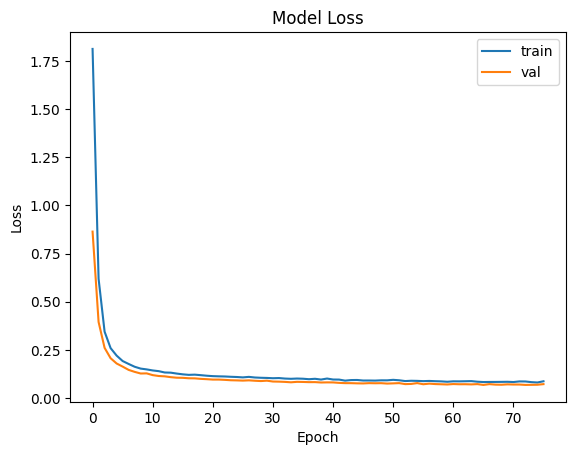

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

The model’s validation loss doesn’t start to increase, and it follows the training loss much more closely, which suggests that the model is less overfit than before.

In [ ]:
#save model as a HDF5 file
model.save('mushroom_classification_model.h5')

In [ ]:
#load model

from tensorflow.keras.models import load_model

loaded_model = load_model('mushroom_classification_model.h5')

In [ ]:
#create a new data point to use on saved model
new_data = pd.DataFrame({
    'cap-shape': ['f'],
    'cap-surface': ['y'],
    'cap-color': ['n'],
    'bruises': ['f'],
    'odor': ['a'],
    'gill-attachment': ['f'],
    'gill-spacing': ['c'],
    'gill-size': ['n'],
    'gill-color': ['b'],
    'stalk-shape': ['e'],
    'stalk-root': ['c'],
    'stalk-surface-above-ring': ['s'],
    'stalk-surface-below-ring': ['s'],
    'stalk-color-above-ring': ['w'],
    'stalk-color-below-ring': ['w'],
    'veil-type': ['p'],
    'veil-color': ['w'],
    'ring-number': ['o'],
    'ring-type': ['p'],
    'spore-print-color': ['n'],
    'population': ['c'],
    'habitat': ['l']
})

In [ ]:
#preprocess the data point
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

In [ ]:
#load model

from tensorflow.keras.models import load_model

loaded_model = load_model('mushroom_classification_model.h5')

# Make predictions
prediction = loaded_model.predict(new_data_encoded)
prediction_class = int(prediction > 0.5)

# Print the prediction
print('Prediction:', prediction_class)



1/1 [==============================] - 0s 77ms/step
Prediction: 1
